# Manipulation des donnnées - Introduction

On fait une première étude rapide des données 

In [98]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/complete_merged_dataset.csv", sep = ";")
df_byGroup = df.groupby("id_client")

In [4]:
time_serie =df_byGroup.get_group(1)[["horodate","real_consumption", "forecasted_consumption"]]

In [5]:
time_serie = time_serie.set_index('horodate')
time_serie

,real_consumption,forecasted_consumption
horodate,,
2021-01-01T00:00:00.000000+0000,8396.00,8400.0
2021-01-02T00:00:00.000000+0000,8395.00,8400.0
2021-01-03T00:00:00.000000+0000,8396.00,8400.0
2021-01-04T00:00:00.000000+0000,8397.00,8400.0
2021-01-05T00:00:00.000000+0000,8395.73,8400.0
...,...,...
2023-01-27T00:00:00.000000+0000,0.00,0.0
2023-01-28T00:00:00.000000+0000,0.00,0.0
2023-01-29T00:00:00.000000+0000,0.00,0.0


In [6]:
time_serie["error"] = time_serie["real_consumption"] - time_serie["forecasted_consumption"]

<Axes: xlabel='horodate'>

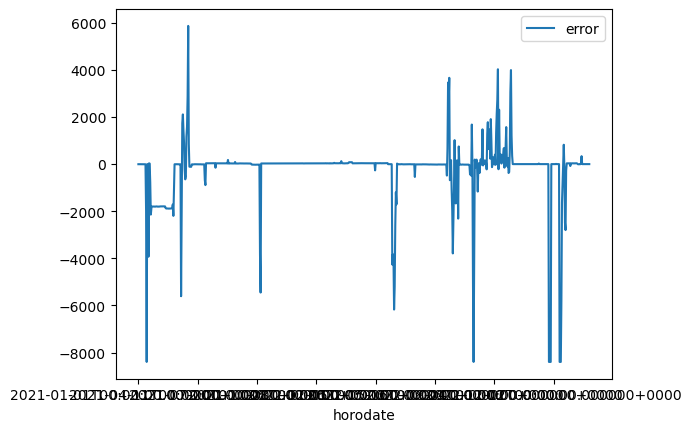

In [7]:
time_serie.plot(y = "error")

<Axes: xlabel='horodate'>

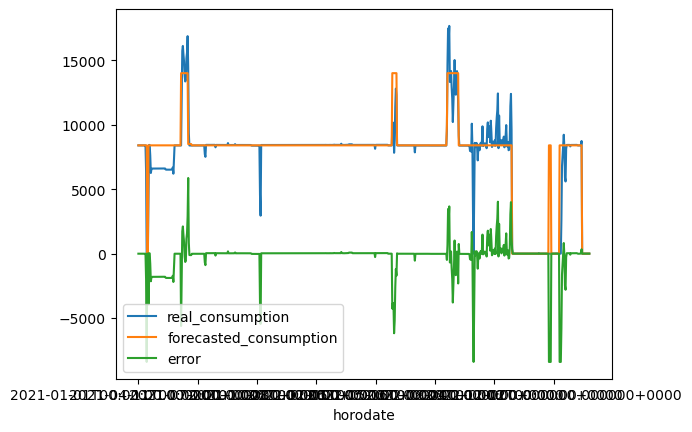

In [8]:
time_serie.plot()

In [9]:
df_byGroup.get_group(1).set_index("horodate")

,id_client,real_consumption,forecasted_consumption,percentile_50,dq,top
horodate,,,,,,
2021-01-01T00:00:00.000000+0000,1,8396.00,8400.0,8323.319457,14000.0,8400.0
2021-01-02T00:00:00.000000+0000,1,8395.00,8400.0,8194.785384,14000.0,8400.0
2021-01-03T00:00:00.000000+0000,1,8396.00,8400.0,8183.265980,14000.0,8400.0
2021-01-04T00:00:00.000000+0000,1,8397.00,8400.0,8420.826672,14000.0,8400.0
2021-01-05T00:00:00.000000+0000,1,8395.73,8400.0,8123.422185,14000.0,8400.0
...,...,...,...,...,...,...
2023-01-27T00:00:00.000000+0000,1,0.00,0.0,8138.044274,14000.0,8400.0
2023-01-28T00:00:00.000000+0000,1,0.00,0.0,8330.466932,14000.0,8400.0
2023-01-29T00:00:00.000000+0000,1,0.00,0.0,8339.560999,14000.0,8400.0


In [10]:
n = df.max()["id_client"]

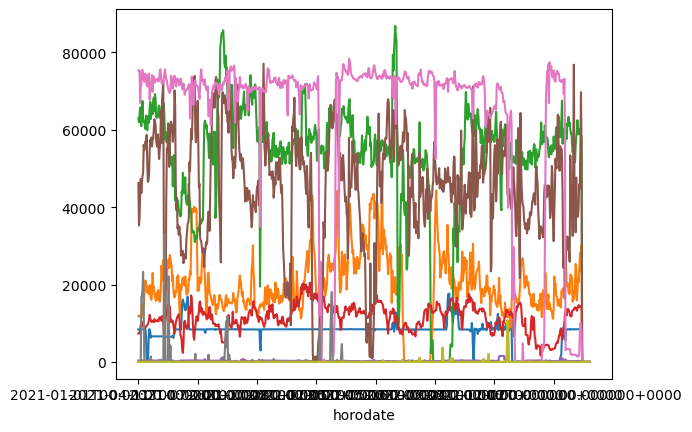

In [11]:
for i in range(10): 
    if i != 7: 
        df_byGroup.get_group(i+1).set_index("horodate")["real_consumption"].plot()

### Idée de quelques trucs à calculer 
- variation avec les périodes de l'année (ex : saison) 
- variation en fonction des acteurs 
- jours particuliers où la correlation entre estimation et demande réelle est particulièrement mauvaise 
- est ce qu'en moyenne les entreprises sur estiment ou sous estiment leurs besoins ? 
- variation avec la météo 

Il faut regarder l'écart avec la demande mais aussi l'évolution brute de la demande. 


In [12]:
clients = df["id_client"].unique()

In [22]:
timeSeries = []
for i in clients:
    timeSeries.append(df_byGroup.get_group(i).set_index("horodate"))

In [40]:
#ajout d'une colonne des erreurs 
for df in timeSeries : 
    df["error_abs"] = np.abs(df["real_consumption"] - df["forecasted_consumption"])
    df["error"] = df["real_consumption"] - df["forecasted_consumption"]

In [77]:
#on cherche les périodes de l'année où les erreurs sont les plus grandes
error_dates = []
seuil = 100 

for df in timeSeries : 
    error_dates.append(df[df["error_abs"] >= df["error_abs"].quantile(0.95)].index)

In [86]:
def parserMonth(date: str): 
    return int(date.split('-')[1])

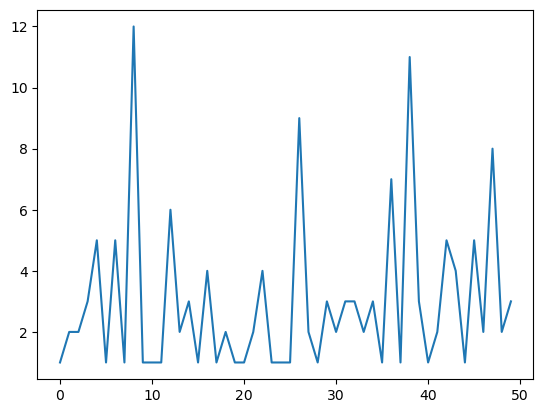

In [99]:
# récupérer le mois où il y a le plus d'erreurs pour chaque client : 
worst_month = []
for i in range(len(clients)) : 
    worst_month.append(max(error_dates[i].map(parserMonth), key = lst.count))
plt.plot(worst_month)

<Axes: xlabel='month'>

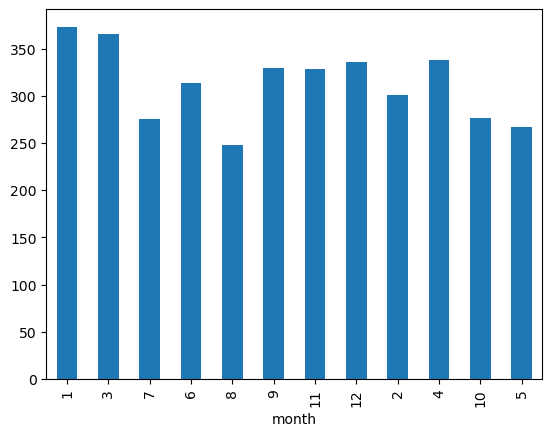

In [128]:
#histogramme général 
dic = {} 
for dates in error_dates : 
    months = dates.map(parserMonth)
    for month in months : 
        dic[str(month)] = dic.get(str(month), 0) + 1 
pd.DataFrame(dic.values(), index = dic.keys()).plot.bar(legend = False, xlabel = "month")